In [285]:
import numpy as np
import cv2
import os
import gc
import matplotlib.pyplot as plt
from skimage.feature import learn_gmm
from scipy.stats import norm

In [286]:
def get_videos_from_classes(dataset_path, classes_to_include):
    # Filter the classes to include only those in the provided list
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and d in classes_to_include]

    # List all video files and their corresponding classes
    all_videos = []
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        video_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        for video_file in video_files:
            all_videos.append((os.path.join(class_path, video_file), class_name))

    return all_videos

def load_videos(video_list):
    # Initialize the lists for storing videos and labels
    X = []
    y = []

    for video_path, class_name in video_list:
        # Read the video using cv2
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Error opening video file {video_path}")
            continue

        frames = []
        # Process the video frame by frame
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            # Convert frame to grayscale
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(frame_gray)

        # Release the video capture object
        cap.release()

        # Store the frames and the corresponding label
        X.append(frames)
        y.append(class_name)

    return X, y



In [287]:
dataset_path = 'dataset/test'
classes_to_include = ['Skiing', 'Surfing', 'PullUps']  


video_list = get_videos_from_classes(dataset_path, classes_to_include)

X, y = load_videos(video_list)


print(f"Number of videos: {len(X)}")
if X:
    print(f"Shape of the first video: {len(X[0])} frames of size {X[0][0].shape}")


Number of videos: 46
Shape of the first video: 178 frames of size (240, 320)


In [288]:
gaussians = []
for video in X:
    histograms = np.zeros((video[0].shape[0],video[0].shape[1],256),dtype=np.uint8)
    for frame in video:
            for x in range(frame.shape[0]):
                for y in range(frame.shape[1]):
                    histograms[x][y][frame[x][y]] += 1 
    break

In [309]:
appended_intensities = []
for i in range(256):
    appended_intensities.extend([i]*histograms[122][200][i])
appended_intensities = np.array(appended_intensities)
gmm = learn_gmm(appended_intensities.reshape((-1,1)),n_modes=6)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


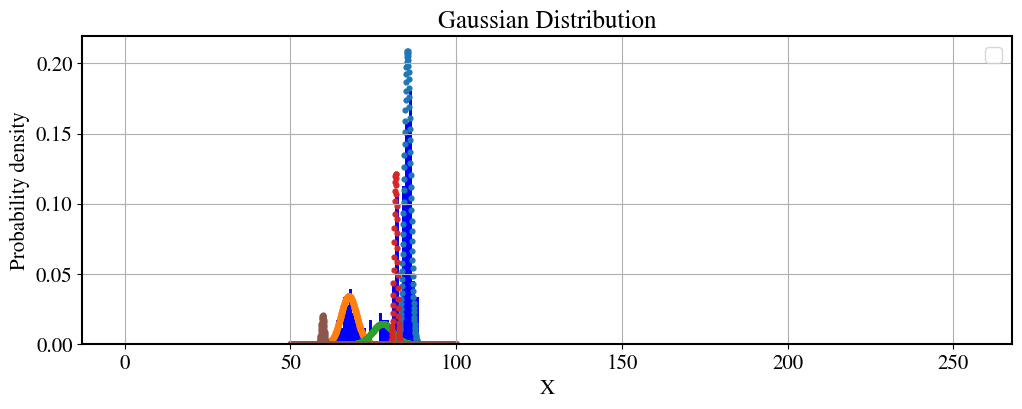

In [313]:
figure = plt.figure(figsize=(12,4))
plt.hist(appended_intensities,range=(0,255),bins=256,density=True,color="blue")
for mu,sigma,weight in zip(gmm.means_,gmm.covariances_ ** 0.5,gmm.weights_):
    x = np.linspace(50,100, 800)
    plt.scatter(x, weight*norm.pdf(x,mu,sigma),s=12)

plt.title('Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
np.eye(6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])